In [1]:
import pandas as pd
import numpy as np
import os

In [27]:
RESULT_FINAL_DIR = 'result/'
MODEL_FINAL_DIR = 'models/'

In [3]:
result = pd.read_csv(os.path.join(RESULT_FINAL_DIR, 'result_clean_feature.csv'))

In [4]:
result

,dataset,n_samples,trial,accuracy,precision,recall,f1_score,confusion_matrix
0,tvae,20000,1,0.802326,0.734234,0.947674,0.827411,"[[113, 59], [9, 163]]"
1,tvae,20000,2,0.796512,0.729730,0.941860,0.822335,"[[112, 60], [10, 162]]"
2,tvae,20000,3,0.799419,0.726872,0.959302,0.827068,"[[110, 62], [7, 165]]"
3,tvae,20000,4,0.799419,0.733032,0.941860,0.824427,"[[113, 59], [10, 162]]"
4,tvae,20000,5,0.805233,0.739726,0.941860,0.828645,"[[115, 57], [10, 162]]"
...,...,...,...,...,...,...,...,...
100,ctabganplus,250000,2,0.851744,0.823529,0.895349,0.857939,"[[139, 33], [18, 154]]"
101,ctabganplus,250000,3,0.854651,0.821053,0.906977,0.861878,"[[138, 34], [16, 156]]"
102,ctabganplus,250000,4,0.863372,0.830688,0.912791,0.869806,"[[140, 32], [15, 157]]"
103,ctabganplus,250000,5,0.857558,0.818653,0.918605,0.865753,"[[137, 35], [14, 158]]"


In [5]:
result.groupby('dataset').mean()

C:\Users\KEY\AppData\Local\Temp\ipykernel_14052\3018995949.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result.groupby('dataset').mean()


,n_samples,trial,accuracy,precision,recall,f1_score
dataset,,,,,,
ctabgan,123809.52381,2.904762,0.795404,0.853231,0.713732,0.776994
ctabganplus,123809.52381,2.904762,0.858804,0.827564,0.906977,0.865345
ctgan,123809.52381,2.904762,0.814507,0.781579,0.873477,0.824821
gaussian_copula,123809.52381,2.904762,0.749169,0.797677,0.667220,0.725453
tvae,123809.52381,2.904762,0.803848,0.733422,0.954873,0.829593


In [6]:
# take the highest f1_Score for each dataset
result.loc[result.groupby('dataset')['f1_score'].idxmax()]

,dataset,n_samples,trial,accuracy,precision,recall,f1_score,confusion_matrix
79,ctabgan,250000,2,0.825581,0.878378,0.755814,0.812500,"[[154, 18], [42, 130]]"
84,ctabganplus,20000,1,0.880814,0.865922,0.901163,0.883191,"[[148, 24], [17, 155]]"
52,ctgan,100000,1,0.848837,0.829670,0.877907,0.853107,"[[141, 31], [21, 151]]"
28,gaussian_copula,50000,3,0.813953,0.821429,0.802326,0.811765,"[[142, 30], [34, 138]]"
10,tvae,100000,1,0.825581,0.752252,0.970930,0.847716,"[[117, 55], [5, 167]]"


In [7]:
result_no_synthetic = pd.read_csv(os.path.join(RESULT_FINAL_DIR, 'result_clean_feature_no_synthetic.csv'))

In [8]:
result_no_synthetic.mean()

C:\Users\KEY\AppData\Local\Temp\ipykernel_14052\4065765759.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result_no_synthetic.mean()


accuracy     0.775581
precision    0.690300
recall       1.000000
f1_score     0.816752
dtype: float64

In [9]:
result_no_synthetic.sort_values(by='f1_score', ascending=False)

,accuracy,precision,recall,f1_score,confusion_matrix
0,0.787791,0.702041,1.0,0.824940,"[[99, 73], [0, 172]]"
3,0.781977,0.696356,1.0,0.821002,"[[97, 75], [0, 172]]"
1,0.773256,0.688000,1.0,0.815166,"[[94, 78], [0, 172]]"
2,0.770349,0.685259,1.0,0.813239,"[[93, 79], [0, 172]]"
4,0.764535,0.679842,1.0,0.809412,"[[91, 81], [0, 172]]"


In [10]:
result_model_n_samples =result.groupby(['dataset', 'n_samples']).mean().reset_index().drop(columns=['trial'])
result_model_n_samples.to_excel(os.path.join(RESULT_FINAL_DIR, 'result_model_n_samples.xlsx'), index=False)

C:\Users\KEY\AppData\Local\Temp\ipykernel_14052\1143956379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_model_n_samples =result.groupby(['dataset', 'n_samples']).mean().reset_index().drop(columns=['trial'])


In [11]:
result_n_samples = result.groupby('n_samples').mean().reset_index().drop(columns=['trial'])
result_n_samples.to_excel(os.path.join(RESULT_FINAL_DIR, 'result_n_samples.xlsx'), index=False)

C:\Users\KEY\AppData\Local\Temp\ipykernel_14052\709036188.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_n_samples = result.groupby('n_samples').mean().reset_index().drop(columns=['trial'])


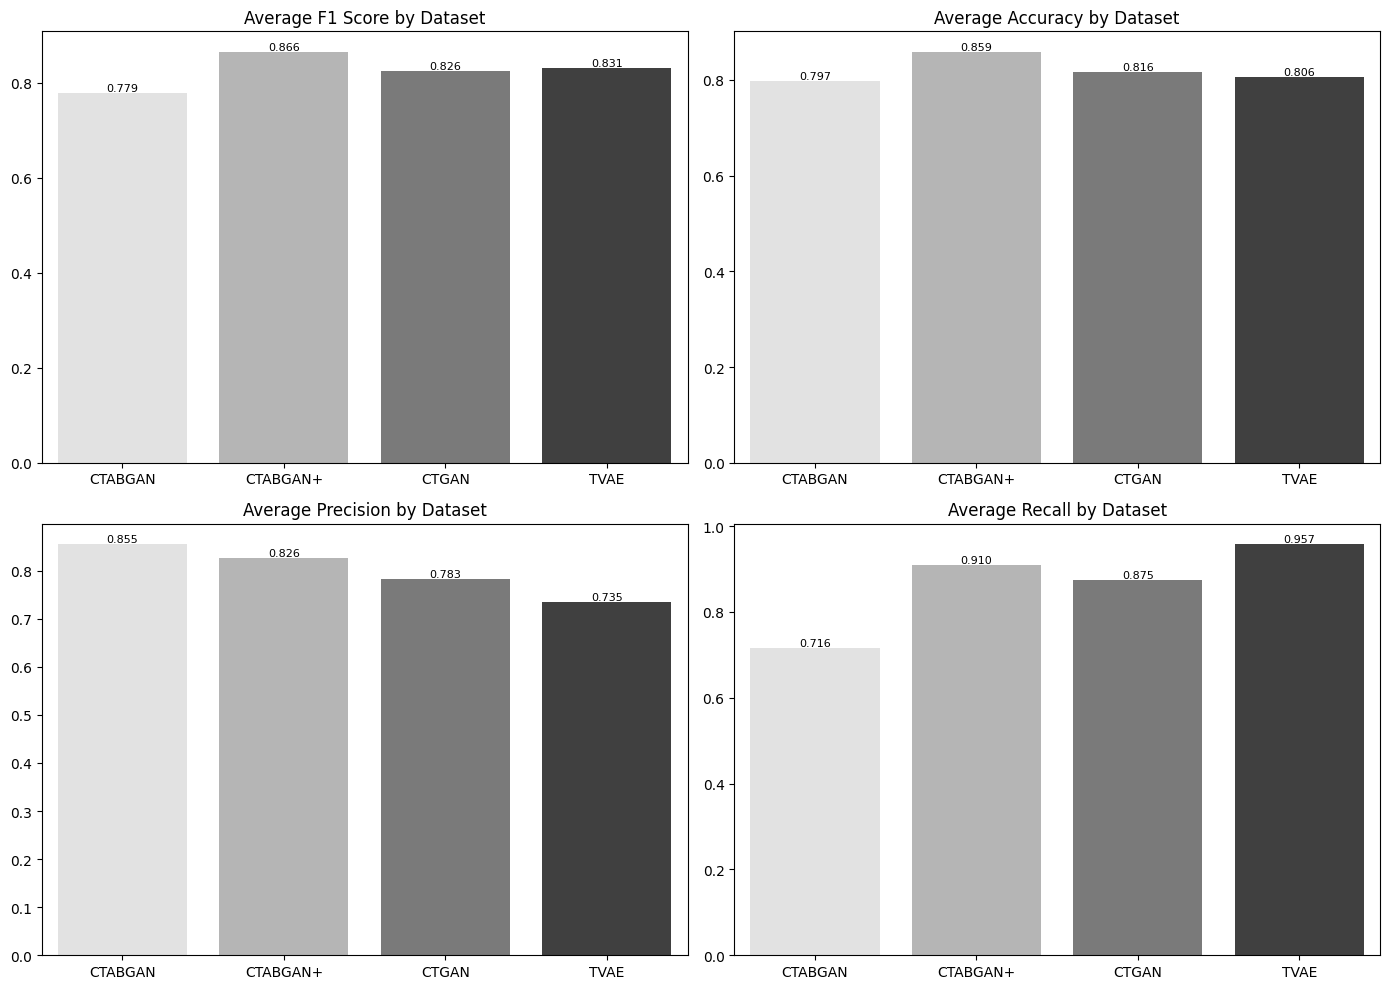

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

mapping = {
    'ctabgan': 'CTABGAN',
    'ctabganplus': 'CTABGAN+',
    'ctgan': 'CTGAN',
    'gaussian_copula': 'Gaussian Copula',
    'tvae': 'TVAE',
}

# Hitung rata-rata per dataset
result_model = result_model_n_samples[result_model_n_samples['dataset']
                                      != 'gaussian_copula'].groupby('dataset').mean().reset_index()
result_model['dataset'] = result_model['dataset'].map(mapping)

# Inisialisasi figure dengan 2 baris dan 2 kolom
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['f1_score', 'accuracy', 'precision', 'recall']
titles = ['Average F1 Score by Dataset', 'Average Accuracy by Dataset',
          'Average Precision by Dataset', 'Average Recall by Dataset']

for ax, metric, title in zip(axs.flat, metrics, titles):
    sns.barplot(data=result_model, x='dataset',
                y=metric, palette='Greys', ax=ax)
    ax.set_title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

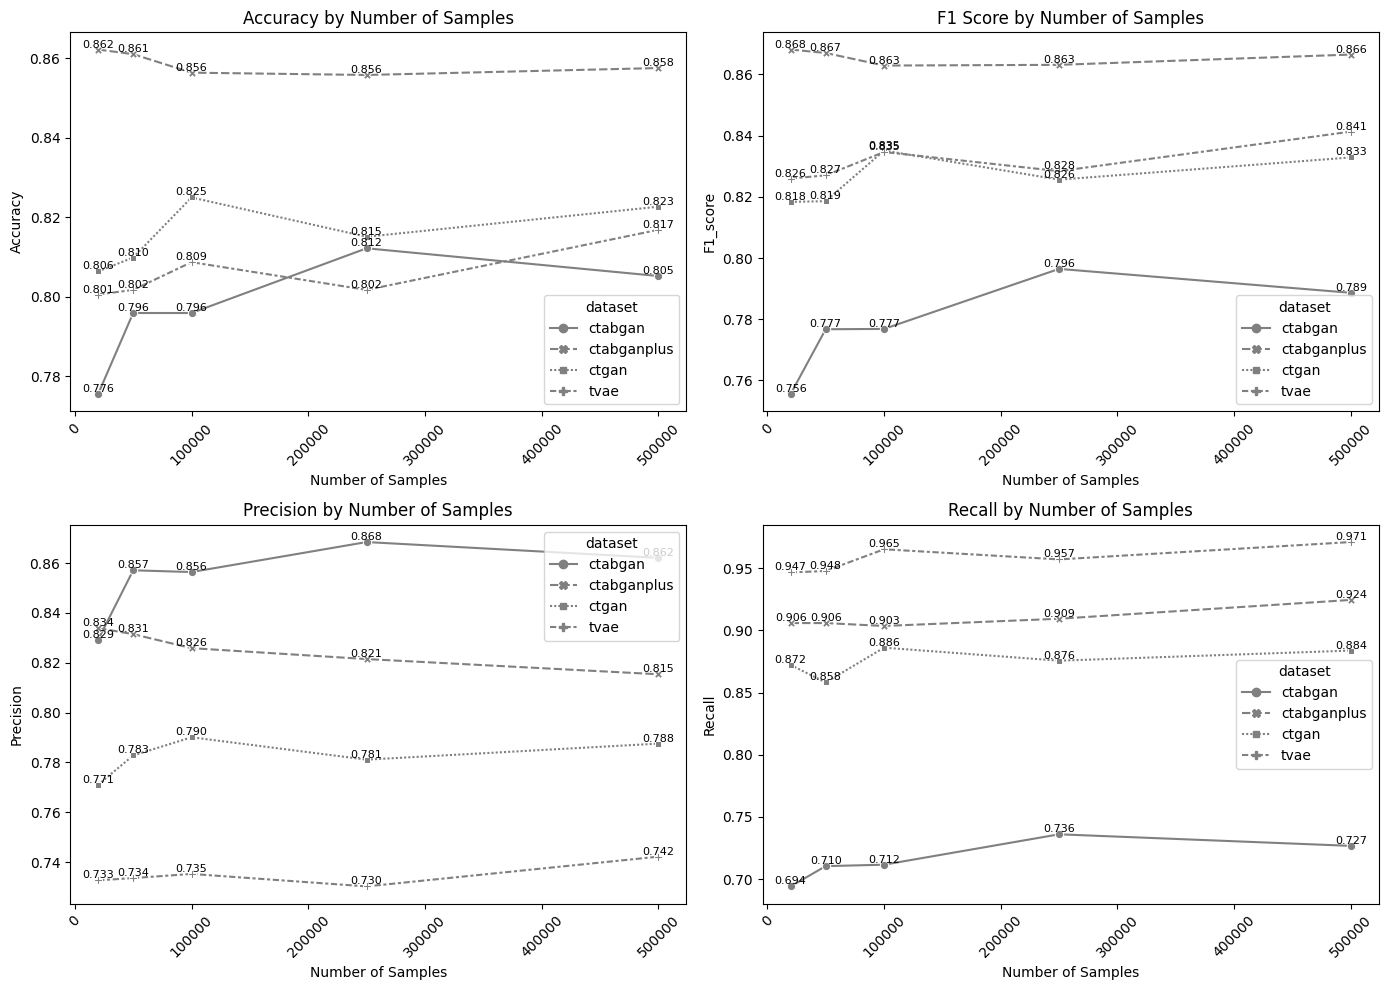

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
filtered_data = result_model_n_samples[result_model_n_samples['dataset']
                                       != 'gaussian_copula']

# Daftar metrik dan judulnya
metrics = ['accuracy', 'f1_score', 'precision', 'recall']
titles = ['Accuracy by Number of Samples', 'F1 Score by Number of Samples',
          'Precision by Number of Samples', 'Recall by Number of Samples']

# Buat subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop setiap metrik dan subplot
for ax, metric, title in zip(axs.flat, metrics, titles):
    sns.lineplot(
        data=filtered_data,
        x='n_samples',
        y=metric,
        hue='dataset',
        style='dataset',
        markers=True,
        dashes=True,
        palette=['grey'] * filtered_data['dataset'].nunique(),
        ax=ax
    )

    # Tambah label angka di setiap titik
    for dataset_name, dataset_group in filtered_data.groupby('dataset'):
        for i in range(len(dataset_group)):
            x = dataset_group.iloc[i]['n_samples']
            y = dataset_group.iloc[i][metric]
            ax.text(x, y, f'{y:.3f}', ha='center',
                    va='bottom', fontsize=8, color='black')

    ax.set_title(title)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel(metric.capitalize())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

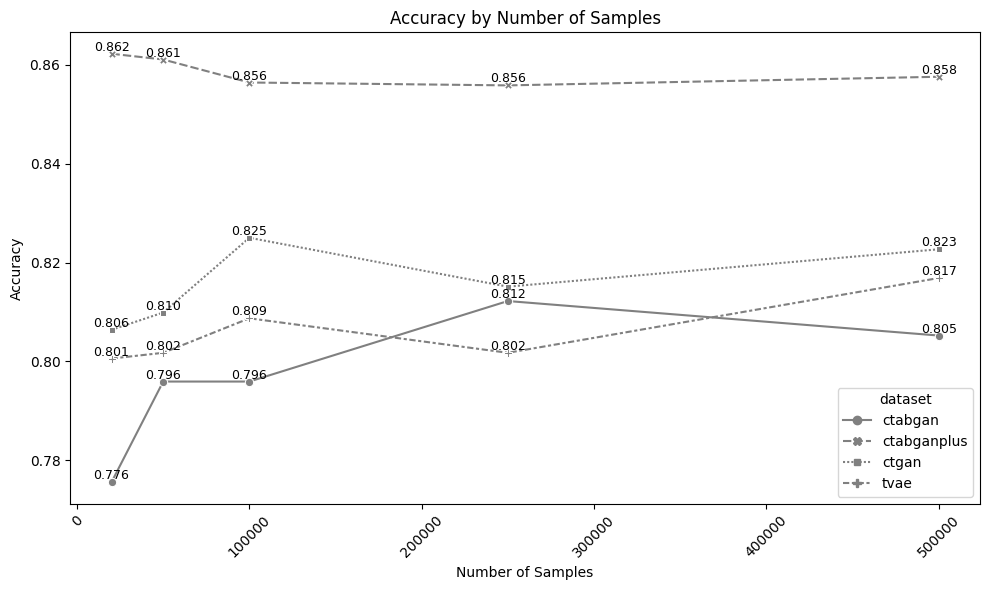

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filter data
filtered_data = result_model_n_samples[result_model_n_samples['dataset']
                                       != 'gaussian_copula']

# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=filtered_data,
    x='n_samples',
    y='accuracy',
    hue='dataset',
    style='dataset',
    markers=True,
    dashes=True,
    palette=['grey']*filtered_data['dataset'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in filtered_data.groupby('dataset'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['n_samples']
        y = dataset_group.iloc[i]['accuracy']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('Accuracy by Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

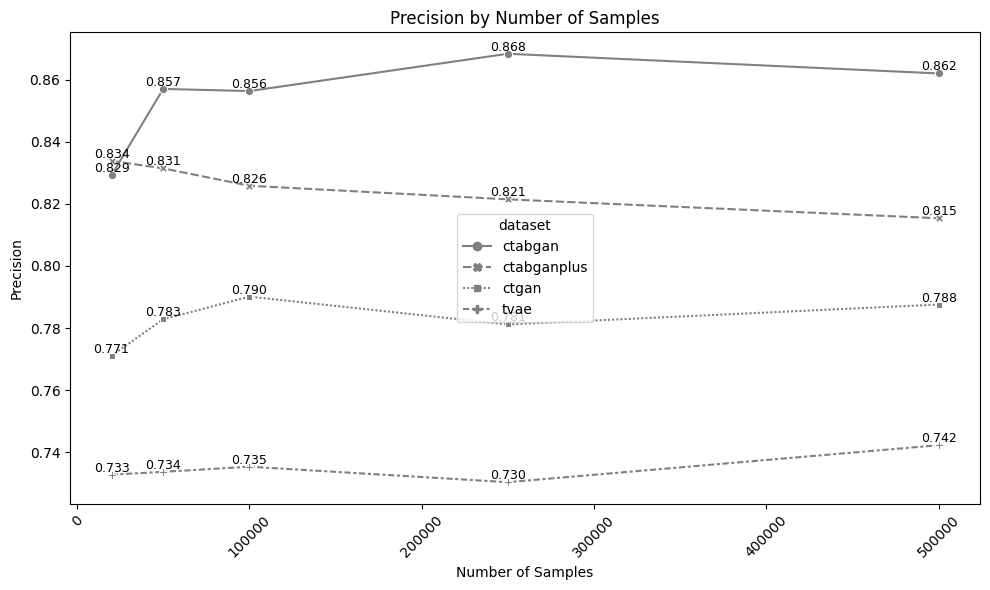

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filter data
filtered_data = result_model_n_samples[result_model_n_samples['dataset']
                                       != 'gaussian_copula']

# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=filtered_data,
    x='n_samples',
    y='precision',
    hue='dataset',
    style='dataset',
    markers=True,
    dashes=True,
    palette=['grey']*filtered_data['dataset'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in filtered_data.groupby('dataset'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['n_samples']
        y = dataset_group.iloc[i]['precision']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('Precision by Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

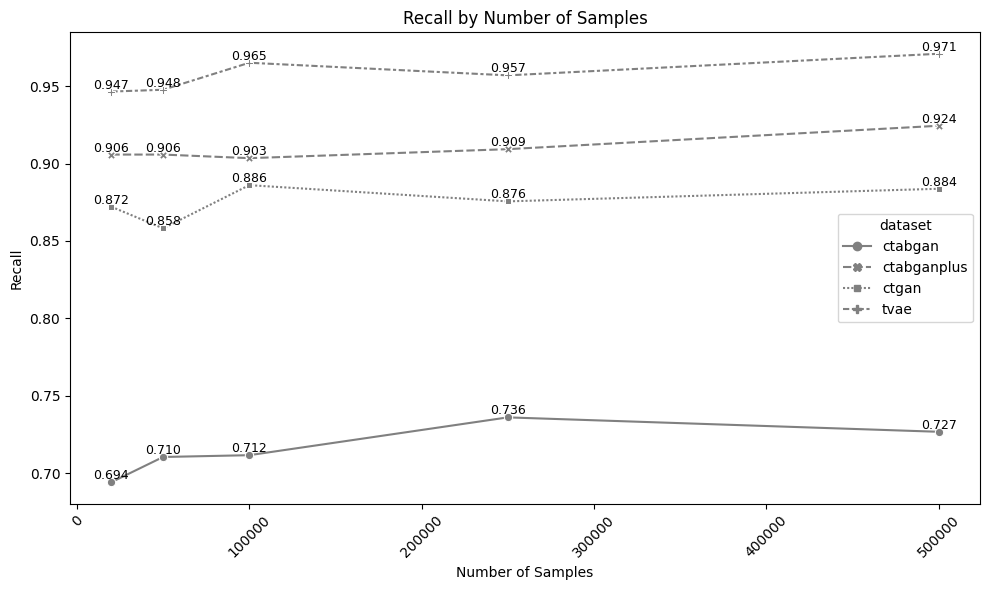

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filter data
filtered_data = result_model_n_samples[result_model_n_samples['dataset']
                                       != 'gaussian_copula']

# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=filtered_data,
    x='n_samples',
    y='recall',
    hue='dataset',
    style='dataset',
    markers=True,
    dashes=True,
    palette=['grey']*filtered_data['dataset'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in filtered_data.groupby('dataset'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['n_samples']
        y = dataset_group.iloc[i]['recall']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('Recall by Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

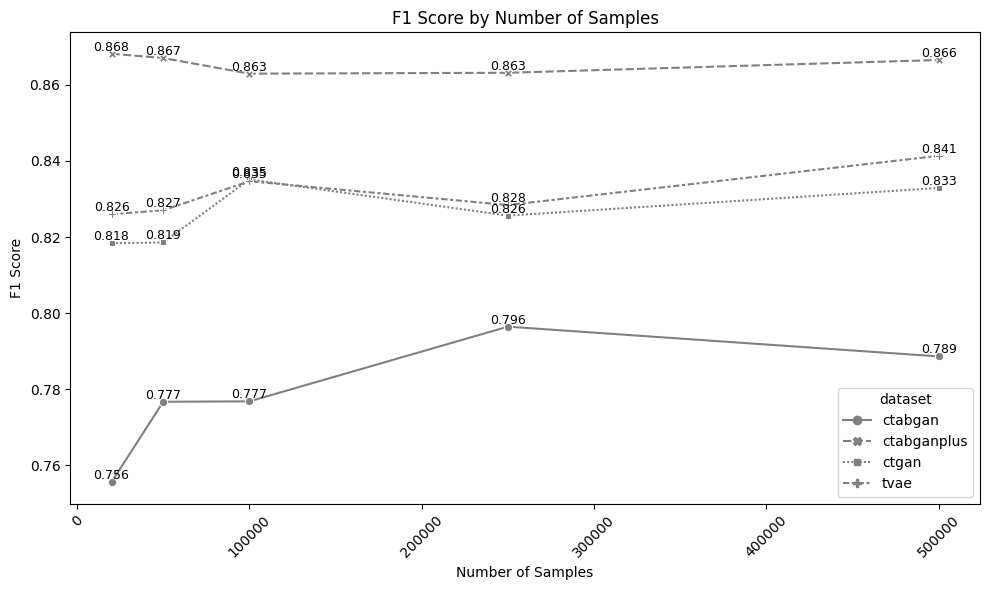

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filter data
filtered_data = result_model_n_samples[result_model_n_samples['dataset']
                                       != 'gaussian_copula']

# Buat lineplot: semua warna sama, bedakan dengan style
sns.lineplot(
    data=filtered_data,
    x='n_samples',
    y='f1_score',
    hue='dataset',
    style='dataset',
    markers=True,
    dashes=True,
    palette=['grey']*filtered_data['dataset'].nunique()  # semua grey
)

# Loop untuk menambahkan label angka di setiap titik
for dataset_name, dataset_group in filtered_data.groupby('dataset'):
    for i in range(len(dataset_group)):
        x = dataset_group.iloc[i]['n_samples']
        y = dataset_group.iloc[i]['f1_score']
        plt.text(x, y, f'{y:.3f}', ha='center',
                 va='bottom', fontsize=9, color='black')

plt.title('F1 Score by Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
result

,dataset,n_samples,trial,accuracy,precision,recall,f1_score,confusion_matrix
0,tvae,20000,1,0.802326,0.734234,0.947674,0.827411,"[[113, 59], [9, 163]]"
1,tvae,20000,2,0.796512,0.729730,0.941860,0.822335,"[[112, 60], [10, 162]]"
2,tvae,20000,3,0.799419,0.726872,0.959302,0.827068,"[[110, 62], [7, 165]]"
3,tvae,20000,4,0.799419,0.733032,0.941860,0.824427,"[[113, 59], [10, 162]]"
4,tvae,20000,5,0.805233,0.739726,0.941860,0.828645,"[[115, 57], [10, 162]]"
...,...,...,...,...,...,...,...,...
100,ctabganplus,250000,2,0.851744,0.823529,0.895349,0.857939,"[[139, 33], [18, 154]]"
101,ctabganplus,250000,3,0.854651,0.821053,0.906977,0.861878,"[[138, 34], [16, 156]]"
102,ctabganplus,250000,4,0.863372,0.830688,0.912791,0.869806,"[[140, 32], [15, 157]]"
103,ctabganplus,250000,5,0.857558,0.818653,0.918605,0.865753,"[[137, 35], [14, 158]]"


In [19]:
# get best row for each dataset based on f1_score
best_rows = result.loc[result.groupby('dataset')['f1_score'].idxmax()]
best_rows

,dataset,n_samples,trial,accuracy,precision,recall,f1_score,confusion_matrix
79,ctabgan,250000,2,0.825581,0.878378,0.755814,0.812500,"[[154, 18], [42, 130]]"
84,ctabganplus,20000,1,0.880814,0.865922,0.901163,0.883191,"[[148, 24], [17, 155]]"
52,ctgan,100000,1,0.848837,0.829670,0.877907,0.853107,"[[141, 31], [21, 151]]"
28,gaussian_copula,50000,3,0.813953,0.821429,0.802326,0.811765,"[[142, 30], [34, 138]]"
10,tvae,100000,1,0.825581,0.752252,0.970930,0.847716,"[[117, 55], [5, 167]]"


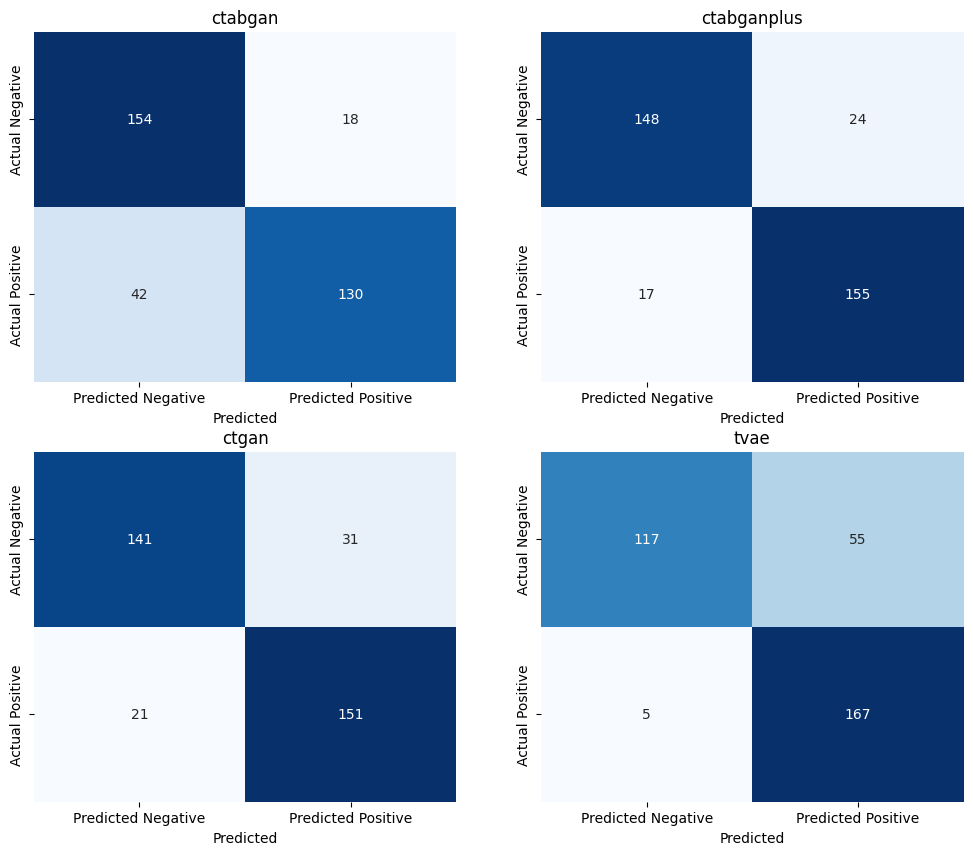

In [23]:
# visualisasi confusion matrix from column confusion_matrix in each row, with form like '[[154, 18], [42, 130]]', make it 4 grid image
import numpy as np
import ast
import matplotlib.pyplot as plt

best_rows = best_rows[best_rows['dataset'] != 'gaussian_copula']

def plot_confusion_matrix(confusion_matrix, title='Confusion Matrix'):
    cm = np.array(ast.literal_eval(confusion_matrix))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix and make it into 1 image, with 4 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i, (index, row) in enumerate(best_rows.iterrows()):
    cm = np.array(ast.literal_eval(row['confusion_matrix']))
    ax = axs[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'], ax=ax)
    ax.set_title(f"{row['dataset']}")
    ax.set_xlabel('Predicted')
    

In [24]:
best_rows.to_excel(os.path.join(RESULT_FINAL_DIR, 'best_rows.xlsx'), index=False)

In [25]:
best_rows

,dataset,n_samples,trial,accuracy,precision,recall,f1_score,confusion_matrix
79,ctabgan,250000,2,0.825581,0.878378,0.755814,0.812500,"[[154, 18], [42, 130]]"
84,ctabganplus,20000,1,0.880814,0.865922,0.901163,0.883191,"[[148, 24], [17, 155]]"
52,ctgan,100000,1,0.848837,0.829670,0.877907,0.853107,"[[141, 31], [21, 151]]"
10,tvae,100000,1,0.825581,0.752252,0.970930,0.847716,"[[117, 55], [5, 167]]"


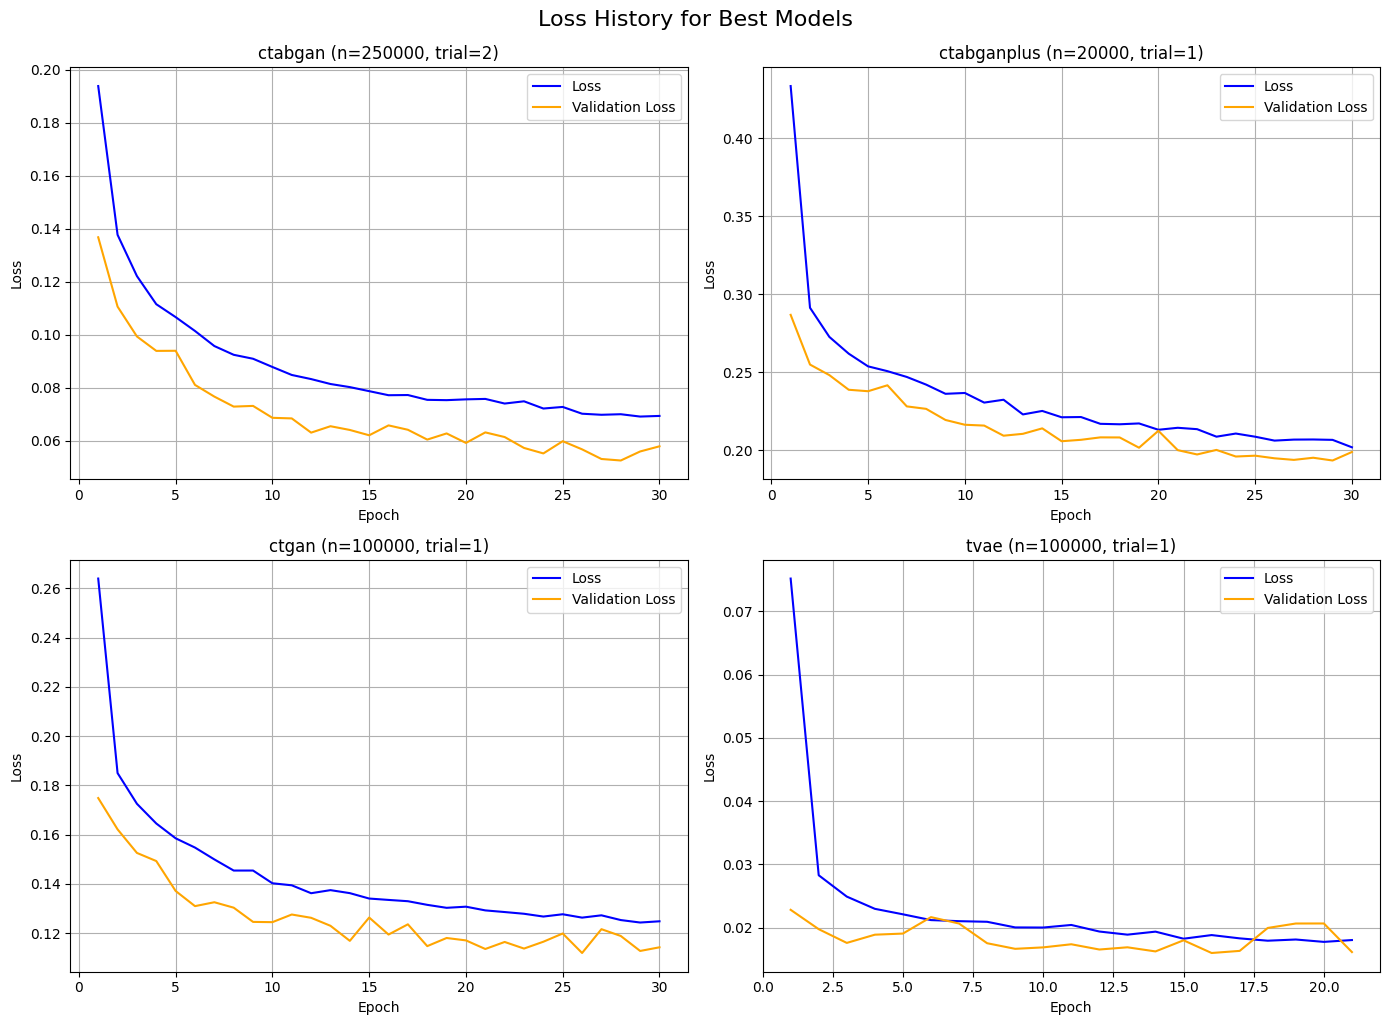

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import os

fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axs = axs.flatten()  # Flatten for easy indexing

for i, (index, row) in enumerate(best_rows.iterrows()):
    if i >= 4:
        break  # hanya 4 plot

    FILE_HISTORY = os.path.join(
        MODEL_FINAL_DIR,
        f"history_clean_feature_{row['dataset']}_{row['n_samples']}_{row['trial']}.csv"
    )

    history = pd.read_csv(FILE_HISTORY)
    history['epoch'] = history.index + 1

    axs[i].plot(history['epoch'], history['loss'], label='Loss', color='blue')
    axs[i].plot(history['epoch'], history['val_loss'],
                label='Validation Loss', color='orange')
    axs[i].set_title(
        f"{row['dataset']} (n={row['n_samples']}, trial={row['trial']})")
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
    axs[i].grid()

# Hapus subplot kosong jika kurang dari 4
for j in range(i+1, 4):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle("Loss History for Best Models", fontsize=16, y=1.02)
plt.show()